# Part IV: Validation and Testing

Authors: Jordi Bolibar & Facundo Sapienza

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 4.1 Cross-validation and testing

The goal of this notebook is to explore different validation and testing methodologies that you can use and the respective considerations you have to consider at the moment of assessing the performance of a given model, either for model selection or test report. 

When training and testing a model, we usually split the dataset among three different sets: training, validation and testing set. Sometimes, this split of the data is done automatically by the method we use, and sometimes instead of a simple split of the dataset into K folds is done iteratively (eg, in k-fold cross-validation). Independently of how we implement this, we need to understand the limitations and considerations we need to have at the moment we do the split. This considerations can include:

- Sampling procedure
- Spatial and temporal correlations between data points
- Size of data available
- Nature of the datasets: where are they coming from? How independent are they?

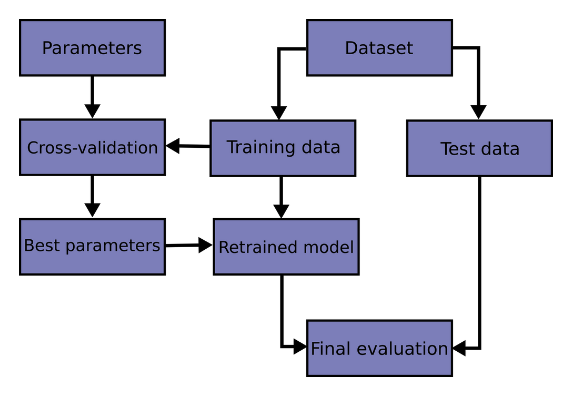

*Figure 1: Cross-validation workflow.*

### [ **Exercice 3** ]
<img src="Figures/eye_logo.png" width="75"/>

How would you design a validation-testing workflow for the problem of predicting the mass balance? How would you divide the different folds?

For an excellent introduction to cross-validation, as well as the different high-level function to implement it in `sklearn` models, checkout [this tutorial](https://scikit-learn.org/stable/modules/cross_validation.html). 

This notebook is up to you to define it. Choose a cross-validation approach, and use it in one of the machine learning models you chose from the previous notebook. Try to tune the hyperparameters as much as you can in cross-validation. In the end, once you are sure you cannot improve performance anymore, load the **test** dataset that we saved in the previous notebook, and assess the final model performance with your selected hyperparameters.

### Happy coding! 

## 4.2 Hyperparameter selection in cross-validation for a chosen model

In [2]:
df_train = pd.read_csv('Data/df_train.csv', index_col=['rgi_id', 'period'])

In [3]:
df_train

PDD   area  icecap     lat     prcp_01   
rgi_id         period                                                    
RGI60-08.01013 2000-2010  28.481926  5.890     0.0  61.553  115.842030  \
               2010-2020  27.721704  5.890     0.0  61.553  111.315490   
RGI60-08.00100 2000-2010  34.256014  0.202     0.0  67.335   45.168559   
               2010-2020  35.019407  0.202     0.0  67.335   47.363380   
RGI60-08.01612 2000-2010  57.809269  0.473     0.0  66.774  213.443987   
...                             ...    ...     ...     ...         ...   
RGI60-08.01693 2010-2020  47.253844  0.060     0.0  60.673  178.535181   
RGI60-08.00989 2000-2010  52.585334  0.343     0.0  61.454   99.273536   
               2010-2020  51.686001  0.343     0.0  61.454   93.655338   
RGI60-08.00920 2000-2010  47.457001  0.978     0.0  62.245  135.176270   
               2010-2020  46.469824  0.978     0.0  62.245  137.897462   

                             prcp_02     prcp_03     prcp_04     prcp_05   
rgi_id         period                                                      
RGI60-08.01013 2000-2010  111.426757  103.546996  115.952889   76.051259  \
               2010-2020   95.657710  107.684596   88.625841   68.525235   
RGI60-08.00100 2000-2010   54.570562   53.921288   52.858914   43.557384   
               2010-2020   48.541604   56.520904   40.814408   38.200953   
RGI60-08.01612 2000-2010  236.112772  236.335490  229.691890  179.270566   
...                              ...         ...         ...         ...   
RGI60-08.01693 2010-2020  144.535281  177.185502  132.965909   98.707363   
RGI60-08.00989 2000-2010   88.845058   73.351647   86.834593   55.964944   
               2010-2020   75.959187   76.098252   65.718962   50.450564   
RGI60-08.00920 2000-2010  149.978627  161.850489  163.682782  110.665278   
               2010-2020  124.340447  169.185589  119.495350   95.735391   

                             prcp_06  ...   temp_09    temp_10   temp_11   
rgi_id         period                 ...                                  
RGI60-08.01013 2000-2010   72.814196  ...  4.372964   7.171111  6.437777  \
               2010-2020   77.320973  ...  4.218519   6.925556  6.118889   
RGI60-08.00100 2000-2010   36.013563  ...  5.743333   9.410740  7.859259   
               2010-2020   51.433020  ...  5.490000   9.328518  7.695925   
RGI60-08.01612 2000-2010  140.446757  ...  6.702222  10.013334  9.494446   
...                              ...  ...       ...        ...       ...   
RGI60-08.01693 2010-2020  100.053766  ...  7.281110   9.884445  9.269999   
RGI60-08.00989 2000-2010   54.106478  ...  6.663334   9.440000  8.550000   
               2010-2020   56.748416  ...  6.543334   9.236667  8.196667   
RGI60-08.00920 2000-2010   99.915991  ...  6.803334   9.504445  9.026667   
               2010-2020  113.680519  ...  6.630001   9.217778  8.743333   

                           temp_12    zmax    zmed    zmin  dmdtda   
rgi_id         period                                                
RGI60-08.01013 2000-2010  2.142963  2259.0  1949.0  1705.0 -0.7472  \
               2010-2020  2.338519  2259.0  1949.0  1705.0 -0.6630   
RGI60-08.00100 2000-2010  2.637037  1573.0  1435.0  1364.0 -0.7864   
               2010-2020  3.603704  1573.0  1435.0  1364.0 -0.4119   
RGI60-08.01612 2000-2010  5.653333  1256.0  1184.0  1086.0 -0.5885   
...                            ...     ...     ...     ...     ...   
RGI60-08.01693 2010-2020  5.722222  1447.0  1427.0  1382.0  0.0383   
RGI60-08.00989 2000-2010  4.040000  2102.0  1935.0  1830.0  0.1073   
               2010-2020  4.223333  2102.0  1935.0  1830.0 -0.6058   
RGI60-08.00920 2000-2010  5.031111  1833.0  1476.0  1309.0 -1.0739   
               2010-2020  5.264444  1833.0  1476.0  1309.0 -1.2059   

                          err_dmdtda  target_id  
rgi_id         period                            
RGI60-08.01013 2000-2010      0.2471     2024.0  
               2010-2020      

Read validation data set for cross-validation:

In [4]:
df_validation = pd.read_csv('Data/df_validation.csv', index_col=['rgi_id', 'period'])

In [5]:
features_to_drop = ['dmdtda', 'err_dmdtda', 'target_id']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['dmdtda']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['dmdtda']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

Define set of hyperparameters to use in cross-validation (rest is default)

In [28]:
parameters = {'hidden_layer_sizes':[(100,20), (10, 10, 10), (20, 20, 20)], 
              'activation':['tanh'],
              'batch_size':[20, 100, 200],
              'max_iter':[5000, 8000]}

Find best hyperparameters in cross-validation:

In [29]:
clf = GridSearchCV(estimator=MLPRegressor(), 
                   param_grid=parameters)

In [30]:
%%time
clf.fit(X_train_scaled, y_train.ravel())

CPU times: user 9min 31s, sys: 51.7 s, total: 10min 23s
Wall time: 9min 9s


GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['tanh'], 'batch_size': [20, 100, 200],
                         'hidden_layer_sizes': [(100, 20), (10, 10, 10),
                                                (20, 20, 20)],
                         'max_iter': [5000, 8000]})

Print best hyperparameters found in cross-validation

In [31]:
print(clf.best_score_)
print(clf.best_params_)

0.24391539510695343
{'activation': 'tanh', 'batch_size': 100, 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 8000}


Define the good neural network

In [32]:
reg_nn = clf.best_estimator_

In [33]:
clf.best_params_['hidden_layer_sizes']

(10, 10, 10)

Train the NN with the best hyperparameters using the training dataset

In [34]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -2.5
    lineEnd = 1.5
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

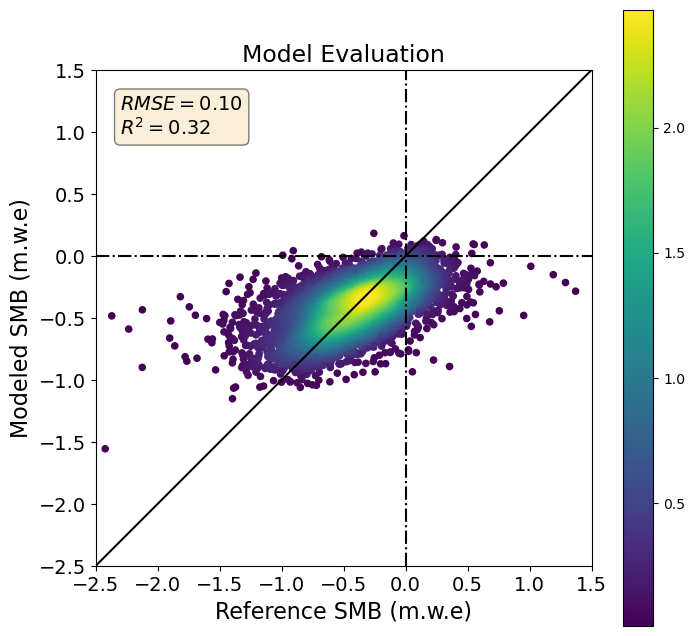

In [35]:
plot_prediction(y_train, reg_nn.predict(X_train_scaled), n_toplot=5000)

## 4.3 Testing the final model

Read test data

In [36]:
df_test = pd.read_csv('Data/df_test.csv', index_col=['rgi_id', 'period'])

Drop variables from data not needed; assign x (predictors) and y (mass balances)

In [37]:
features_to_drop = ['dmdtda', 'err_dmdtda', 'target_id']

df_test_X = df_test.drop(features_to_drop, axis=1)
df_test_y = df_test[['dmdtda']]

X_test, y_test = df_test_X.values, df_test_y.values

In [38]:
scaler = StandardScaler()
scaler.fit(X_test)

StandardScaler()

In [39]:
X_test_scaled = scaler.transform(X_test)

Apply found parameters and hyperparameters to the test dataset and plot the prediction

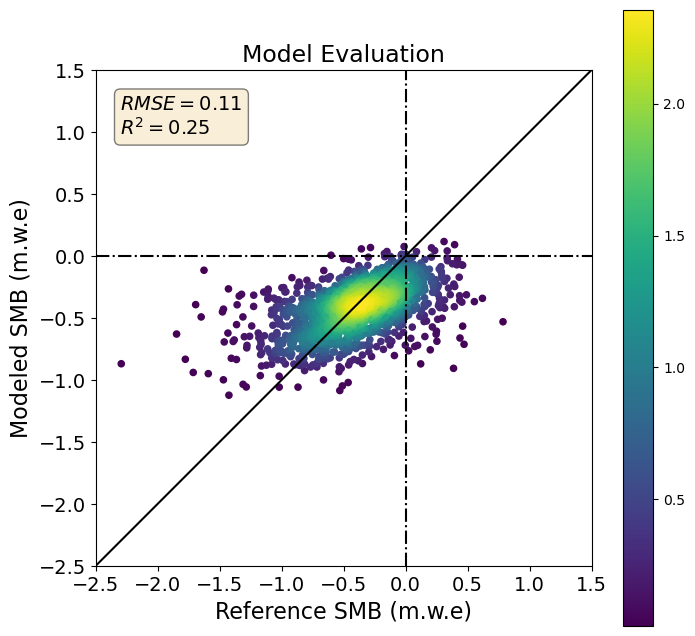

In [40]:
plot_prediction(y_test, reg_nn.predict(X_test_scaled), n_toplot=5000)